In [1]:
import pandas as pd

df = pd.read_csv('./data/train.csv', encoding = 'cp949')

# 원본 데이터 백업
titanic_df = df.copy()

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


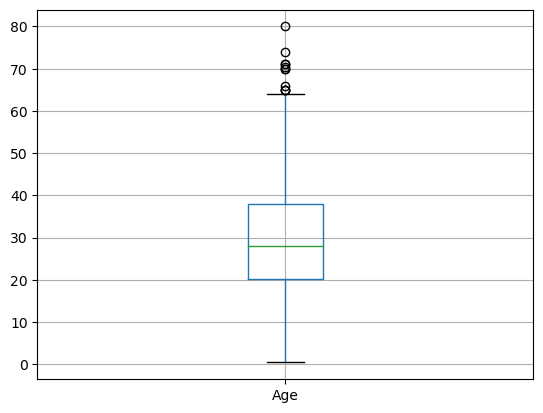

In [3]:
import matplotlib.pyplot as plt 

# 새 그래프 캔버스 생성
plt.figure()

# Age 컬럼의 상자 그림 생성
df[['Age']].boxplot()

# 그래프 표시
plt.show()

In [4]:
def replace_iqr_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)         # Q1
    q3 = dataframe[column].quantile(0.75)         # Q3
    iqr = q3 - q1                                 # IQR (사분위 범위)
    iqr_margin = 1.5 * iqr                        # 이상치 판단 기준 (1.5배)

    lower_bound = q1 - iqr_margin                 # 하한선
    upper_bound = q3 + iqr_margin                 # 상한선

    dataframe.loc[(dataframe[column] > upper_bound), column] = upper_bound
    dataframe.loc[(dataframe[column] < lower_bound), column] = lower_bound

    return dataframe

In [5]:
df = replace_iqr_outliers(df, 'Age')

In [6]:
def count_iqr_outliers(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    
    iqr = q3 - q1 
    outlier_range = 1.5 * iqr  
    
    lower_bound = q1 - outlier_range
    upper_bound = q3 + outlier_range

    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return len(outliers)

In [7]:
count_iqr_outliers(df, 'Age')

0

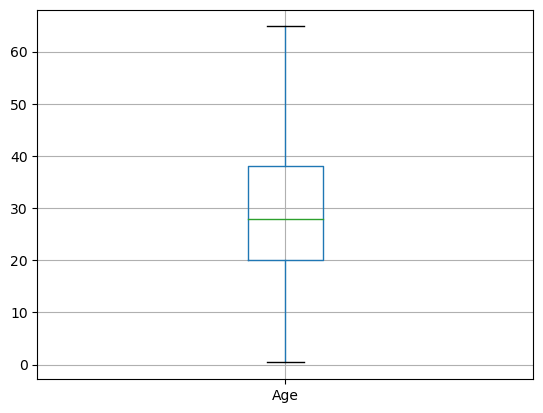

In [8]:
plt.figure()
df[['Age']].boxplot()
plt.show()

In [9]:
# 절댓값이 1.96을 초과하는 Z-score
# 데이터 분포가 양쪽 끝 2.5% 씩,총 5%에 해당하는 영역
# df[(abs( (df['Age'] - df['Age'].mean()) / df['Age'].std() )) > 1.96]

In [10]:
# 이상치 인덱스들
outlier_indexes = df[(abs((df['Age']-df['Age'].mean())/df['Age'].std())) > 1.96].index

# 이상치 인덱스를 찾아 제거함
df = df.drop(outlier_indexes)

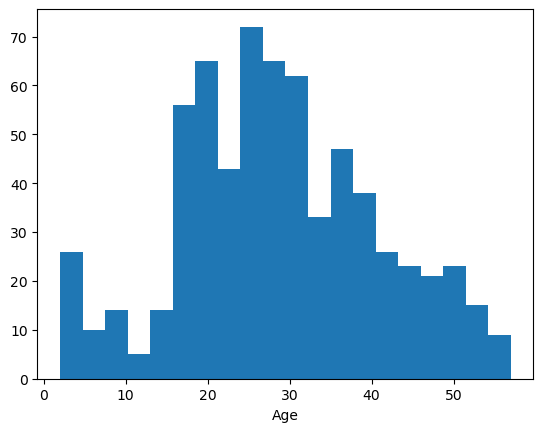

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.show()